In [39]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns

In [40]:
clean = pd.read_excel("Clean.xlsx")

In [41]:
category = ["Price-Sensitive Customers" , "Product-Focused Customers" , "Loyalty-Driven Customers" , "Convenience-Oriented Customers" , "High-Value Customers"]

categories = []

for i in category:
    df = pd.read_excel("Category.xlsx" , sheet_name = i)
    categories.append(df)

In [42]:
df = categories[3]
df

,Sale Price,Shopee Discount,Hour_sin
0,199.0,0,-0.258819
1,22.0,0,0.500000
2,59.0,0,0.500000
3,55.0,0,0.500000
4,49.0,0,0.258819
...,...,...,...
16600,35.0,0,-0.965926
16601,35.0,0,-0.965926
16602,49.0,0,-0.500000
16603,48.0,0,-0.500000


In [43]:
df.columns

Index(['Sale Price', 'Shopee Discount', 'Hour_sin'], dtype='object')

**Data Preprocessing**

In [44]:
scaler = MinMaxScaler()
for feature in df.columns:
    df[[feature]] = scaler.fit_transform(df[[feature]])

In [45]:
sse = []
k_range = range(1 , 10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

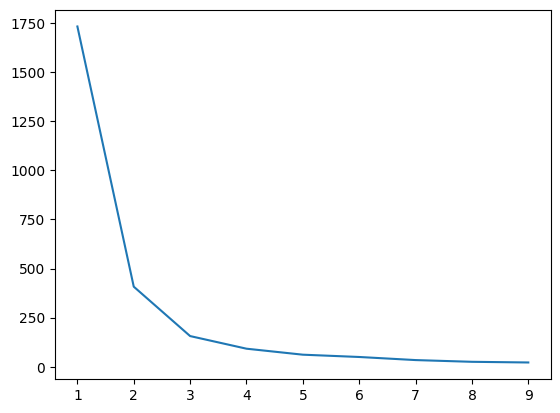

In [46]:
plt.plot(k_range , sse)

In [47]:
#4 is the elbow point
km = KMeans(n_clusters= 3)

In [48]:
km.fit(df)

KMeans(n_clusters=3)

In [49]:
y_pred = km.predict(df)

df["cluster"] = y_pred

In [50]:
cluster_list = []
for i in range(3):
    cluster_list.append(df[df["cluster"] == i])

In [51]:
cluster_list[0]

,Sale Price,Shopee Discount,Hour_sin,cluster
1,0.002332,0.0,0.750000,0
2,0.006253,0.0,0.750000,0
3,0.005829,0.0,0.750000,0
29,0.006359,0.0,0.982963,0
30,0.001060,0.0,0.982963,0
...,...,...,...,...
16592,0.006147,0.0,0.853553,0
16593,0.001060,0.0,0.853553,0
16594,0.003639,0.0,0.853553,0
16597,0.040276,0.0,0.982963,0


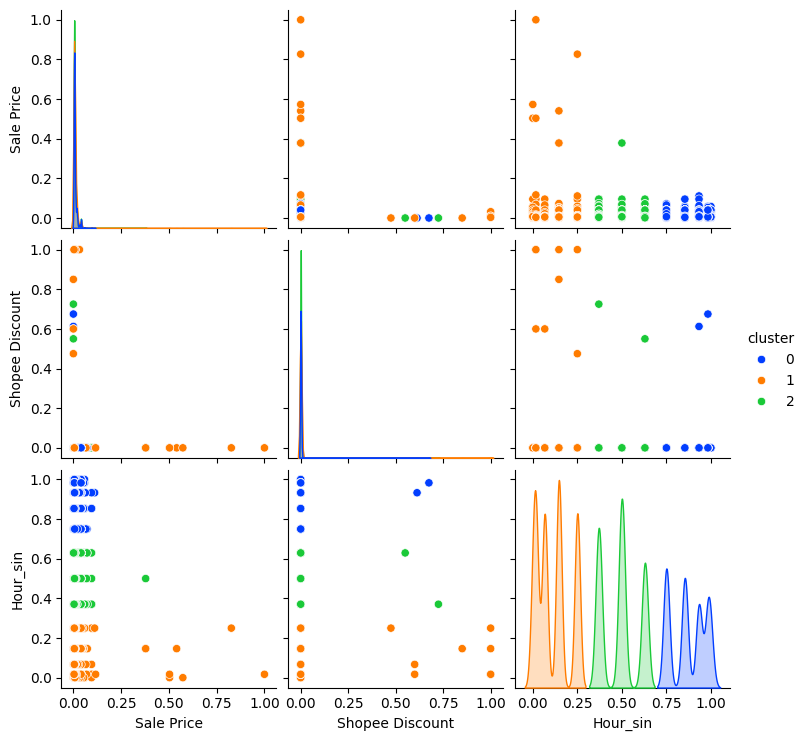

In [52]:
sns.pairplot(df , hue = "cluster" , palette = "bright")

<Axes: xlabel='Hour_sin', ylabel='Sale Price'>

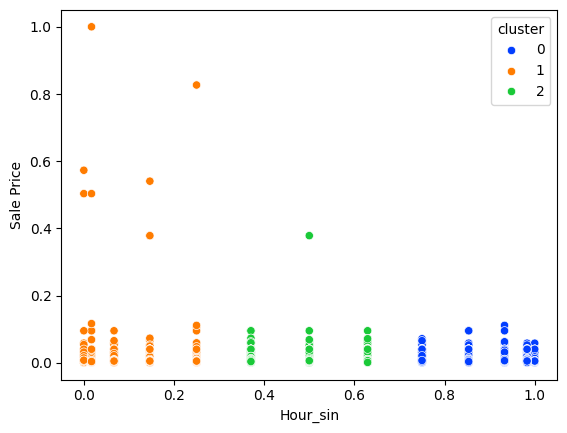

In [53]:
sns.scatterplot(data = df , x = "Hour_sin" , y = "Sale Price" , hue = "cluster" , palette = "bright")

In [54]:
clean.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ชื่อผู้ใช้ (ผู้ซื้อ),วันที่ทำการสั่งซื้อ,เวลาการชำระสินค้า,ช่องทางการชำระเงิน (รายละเอียด),แผนการผ่อนชำระ,ตัวเลือกการจัดส่ง,*หมายเลขติดตามพัสดุ,...,ช่องทางการชำระเงิน_QR พร้อมเพย์,ช่องทางการชำระเงิน_SPayLater,ช่องทางการชำระเงิน_ShopeePay,ช่องทางการชำระเงิน_ShopeePay - ตัดบัญชีธนาคาร,ช่องทางการชำระเงิน_บัตรเครดิต/บัตรเดบิต,ช่องทางการชำระเงิน_เก็บเงินปลายทาง,ช่องทางการชำระเงิน_ไม่ต้องชำระเงิน,Purchase frequency,Price-Sensitive Customers,Convenience-Oriented Customers
0,0,0,0,cariperr.timm,2023-01-02 13:26:00,2023-01-02 13:27:00,NaN,Airpay GIRO,Standard Delivery - ส่งธรรมดาในประเทศ-SPX Express,SPXTH038051184011,...,False,False,False,True,False,False,False,1.0,True,Mid Day Customer
1,1,1,1,suchanat_niraharnee,2023-01-03 10:06:00,2023-01-03 10:07:00,NaN,Airpay Wallet V2,Standard Delivery - ส่งธรรมดาในประเทศ-Kerry,SHP5317703539,...,False,False,True,False,False,False,False,3.0,True,Night Customer
2,2,2,2,suchanat_niraharnee,2023-01-03 10:06:00,2023-01-03 10:07:00,NaN,Airpay Wallet V2,Standard Delivery - ส่งธรรมดาในประเทศ-Kerry,SHP5317703539,...,False,False,True,False,False,False,False,3.0,True,Night Customer
3,3,3,3,suchanat_niraharnee,2023-01-03 10:06:00,2023-01-03 10:07:00,NaN,Airpay Wallet V2,Standard Delivery - ส่งธรรมดาในประเทศ-Kerry,SHP5317703539,...,False,False,True,False,False,False,False,3.0,True,Night Customer
4,4,4,4,kitdykat,2023-01-03 11:14:00,2023-01-03 11:45:00,NaN,Cash on Delivery,Standard Delivery - ส่งธรรมดาในประเทศ-Kerry,SHP5317717110,...,False,False,False,False,False,True,False,3.0,True,Mid Day Customer


In [57]:
cat = category[3]

def add_cat(x):

    if x["cluster"] == 1:
        x[cat] = "Morning Customer"
    elif x["cluster"] == 2:
        x[cat] = "Mid Day Customer"
    elif x["cluster"] == 0:
        x[cat] = "Night Customer"
        
    return x

df = df.apply(add_cat , axis =  1)

clean[cat] = df[cat]

In [58]:
clean.to_excel("Clean.xlsx")